In [76]:
import numpy as np
import pandas as pd


In [77]:
!sed 's/,$//' <(curl 'https://drive.google.com/uc?export=download&id=1K1XD1sETaCkO147uzSoqOadWFsFdGs2r') > test_df.csv
!sed 's/,$//' <(curl 'https://drive.google.com/uc?export=download&id=1kffWWtIBd-pDeLp3ulJbiiYFpaTSLE2e') > train_df.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


Preprcoessing


In [78]:
from sklearn import preprocessing
label_encoder_1=preprocessing.LabelEncoder()
label_encoder_2=preprocessing.LabelEncoder()
label_encoder_3=preprocessing.LabelEncoder()

In [79]:
def pipeline(dataset):
  dataset=dataset.drop(columns=['PassengerId','Name','Cabin','Ticket'])
  dataset['Sex']= label_encoder_1.fit_transform(dataset['Sex'])
  dataset['Embarked']= label_encoder_2.fit_transform(dataset['Embarked'])
  return dataset

In [80]:
dataset=pipeline(train_df)
dataset=dataset.fillna(dataset.mean(numeric_only=True))


In [81]:
dataset = dataset.astype(float)
y=dataset['Survived']
X=dataset.drop(columns=['Survived'])
X2=X[601:890]
y2=y[601:890]
X=X[0:600]
y=y[0:600]

In [82]:
X.shape

(600, 7)

In [83]:
X=X.to_numpy() #Feature Matrix(Training Input)
y=y.to_numpy() #Training Labels
X2=X2.to_numpy()
y2=y2.to_numpy()
print(X)
print(y)

[[ 3.          1.         22.         ...  0.          7.25
   2.        ]
 [ 1.          0.         38.         ...  0.         71.2833
   0.        ]
 [ 3.          0.         26.         ...  0.          7.925
   2.        ]
 ...
 [ 3.          1.         49.         ...  0.          0.
   2.        ]
 [ 3.          1.         29.69911765 ...  0.          7.225
   0.        ]
 [ 1.          1.         49.         ...  0.         56.9292
   0.        ]]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

In [84]:
X.shape

(600, 7)

In [85]:
y=np.reshape(y,(-1,1))
y2=np.reshape(y2,(-1,1))

In [86]:
def sigmoid(z):
  z=np.float128(z)
  return 1/(1+np.exp(-z))

In [87]:
cost_array=[];
def cost(y, h):
    n=y.shape[0]
    cost = (-np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)))/n
    return(cost)

In [88]:
def val(w,b):
  y2_cap=np.dot(X2,w)+b
#  print(b.shape)
  h2=sigmoid(y2_cap)
  h2=np.where(h2>0.5,1,0)
  print(f'val_test cost = {cost(y2,h2)}', end=" ")
  print(f' accuracy = {accuracy(h2,y2)}\n')


In [89]:
  cost_array=[];

In [90]:
def logistic_regression(X,y,lr,num_iterations,lamda_reg):
  n,d=X.shape
  w =np.reshape(np.random.rand(d),(-1,1))
  b= np.random.rand()   #d is the numnbe rof columns to ue for predction
  for i in range(num_iterations):           #w is basically a coumn vector
    print(f"Iteration Number :{i+1}\n")
    y_cap=np.dot(X,w)+b # returns essentially a 1 D array each elemte of which is the net y for each passenger
    h=sigmoid(y_cap)
    gradient=(1/n)*(np.dot(X.T,h-y))
    grad2=(1/n)*(np.sum(h-y))
    b=b-lr*grad2
    w=w-lr*gradient
    print(f'train cost = {cost(y,h)}', end=" ")
    print(f'train accuracy = {accuracy(h,y)}\n')

    cost_array.append(cost(y,h))
    val(w,b)
    print('─' * 50)
  return w


In [91]:
# def accuracy(h,w):
#   n=h.shape[0]
#   acc=0
#   for i in range(n):
#     if((h[i]>=0.5 and y[i]==1) or (h[i]<0.5 and y[i]==0)):
#       acc+=1
#   print(f"Accuracy= {acc/n}\n")

In [92]:
def accuracy(h,w):
    n=h.shape[0]
    acc=0
    for i in range(0,n-1):
      acc+=np.abs(h[i]-w[i])
    return (1-acc/n)

In [93]:
w=logistic_regression(X,y,0.004,10000,5)

Iteration Number :1

train cost = nan train accuracy = [0.39333319]

val_test cost = nan  accuracy = [0.3633218]

──────────────────────────────────────────────────
Iteration Number :2

train cost = nan train accuracy = [0.39333294]

val_test cost = nan  accuracy = [0.3633218]

──────────────────────────────────────────────────
Iteration Number :3

train cost = nan train accuracy = [0.39333222]

val_test cost = nan  accuracy = [0.3633218]

──────────────────────────────────────────────────
Iteration Number :4

train cost = nan train accuracy = [0.39333007]

val_test cost = nan  accuracy = [0.3633218]

──────────────────────────────────────────────────
Iteration Number :5

train cost = nan train accuracy = [0.39332314]

val_test cost = nan  accuracy = [0.3633218]

──────────────────────────────────────────────────
Iteration Number :6

train cost = inf train accuracy = [0.39329802]

val_test cost = nan  accuracy = [0.3633218]

──────────────────────────────────────────────────
Iteration 

<ipython-input-87-cf4d8d6f18a6>:4: RuntimeWarning: divide by zero encountered in log
  cost = (-np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)))/n
<ipython-input-87-cf4d8d6f18a6>:4: RuntimeWarning: invalid value encountered in multiply
  cost = (-np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)))/n


Streaming output truncated to the last 5000 lines.

──────────────────────────────────────────────────
Iteration Number :9287

train cost = 0.5128730468333902 train accuracy = [0.65211272]

val_test cost = nan  accuracy = [0.78892734]

──────────────────────────────────────────────────
Iteration Number :9288

train cost = 0.5099201083659646 train accuracy = [0.65627567]

val_test cost = nan  accuracy = [0.78892734]

──────────────────────────────────────────────────
Iteration Number :9289

train cost = 0.512860091048138 train accuracy = [0.65212255]

val_test cost = nan  accuracy = [0.78892734]

──────────────────────────────────────────────────
Iteration Number :9290

train cost = 0.5099092713240982 train accuracy = [0.6562847]

val_test cost = nan  accuracy = [0.78892734]

──────────────────────────────────────────────────
Iteration Number :9291

train cost = 0.5128471416514858 train accuracy = [0.65213237]

val_test cost = nan  accuracy = [0.78892734]

──────────────────────────────

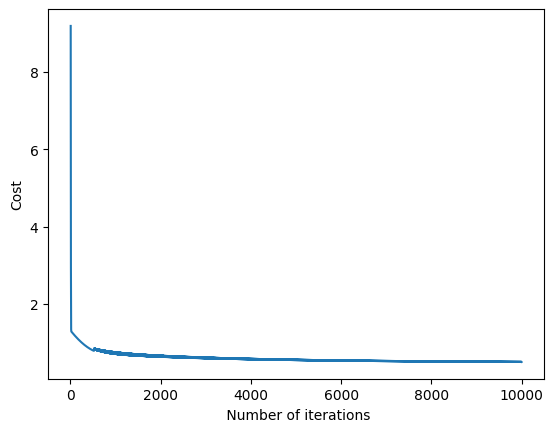

In [94]:
import matplotlib.pyplot as plt
plt.plot(cost_array)

# Set labels for the axes
plt.xlabel(' Number of iterations')
plt.ylabel('Cost')

# Show the plot
plt.show()

In [95]:
print(cost_array)

[nan, nan, nan, nan, nan, inf, 9.186870422356739883, 7.0782835163001102236, 5.641262064065738837, 4.5856021282947354045, 3.69199413615533498, 2.9525292742907686865, 2.3684381155388121343, 1.928865332200623147, 1.6029760333768689748, 1.4177541644686531847, 1.3441727492761726126, 1.3153198683663186932, 1.3032437989043845484, 1.2971127135810231673, 1.29351472275198533, 1.2910550231713963919, 1.2891268876824458431, 1.2874542180665092397, 1.2859086603838895137, 1.2844279474686821957, 1.2829810975925867359, 1.2815523824576946436, 1.2801337321872587844, 1.2787209776875809375, 1.2773119570395792667, 1.2759055469076227896, 1.2745011633260036226, 1.2730985030447927468, 1.2716974090966627416, 1.2702978007901360064, 1.2688996372118075048, 1.2675028981885209349, 1.2661075743557055881, 1.2647136619774253043, 1.2633211602459949703, 1.2619300698752411616, 1.2605403923683465942, 1.2591521296372322059, 1.2577652838049684758, 1.2563798571033806395, 1.2549958518200989938, 1.2536132702712507282, 1.25223211

Making the test dataset

In [96]:
db2=pipeline(test_df)
db2=db2.fillna(dataset.mean(numeric_only=True))
db2=db2.to_numpy()

In [97]:
y3_cap=np.dot(db2,w)
h3=sigmoid(y3_cap)
h3 = np.where(h3 > 0.5, 1, 0)



In [98]:
print(h3)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]


In [99]:
test_df['Survived']=h3

In [100]:
print(test_df)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0

In [101]:
test_df.to_csv('predictions.csv')

In [102]:
from google.colab import files
files.download("predictions")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>